

# Project: Investigation of TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For this project, the TMDb movie data has been selected which was cleaned fromthe orginal data on Kaggle. It contains information of about 10,000 movies collected from The Movies Database (TMDb), including users rating and revenues.
>
>Given from the notes, certains columns like 'cast' and 'genres', contains multiple values separated by pipe(|) charaters, therefore splitting them would be part of the cleaning process. Some odd characters are in the 'cast' but instrustions says they can be ignored and the final two columns ending with '_ ad' shows the budget and revenue for the movies in terms of 2010 dollars, accouting for inflation over time 
>
>**Key Questions**:
><li> Which genres are most popular from year to year? </li>
><li>What kinds of properties are associated with movies that have high revenues?</li>
><li>What factors affect the movies average vote (rating)?</li>
>
>

In [1]:
# In this cell, import the libaries I intend to used for the project were imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# The magic word '%matplotlib inline' in included so that visualizations
# are plotted inline with the notebook. 

<a id='wrangling'></a>
## Data Wrangling



### General Properties
> In this session, after loading the data set and performing some inspections, it was observed that;
><li>Columns not relivant for the analysis were in the data set and has to be dropped
><li>Some columns like the cast and genres contain several multiple values that have to be seperated

In [2]:
# Loaded data and print out a few lines.
df= pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Checked the number of movies (row) and column in this data set
df.shape

(10866, 21)

In [4]:
# Inspected the data type of each column. I was observed that each data type seem valid with the column that bears it.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# Viewed number of unique vlaue in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
# With this, i was able to know the number of entries in the dataset and columns with Nones.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1





### TMDb Movie Dataset Cleaning

#### Data Triming 1

In this session, I removed the column that won't be of help for my analysis. Column budget and revenue were removered because the budget_adj and revenue_adj column term of 2010 dollars and the inflation over time was accounted for, unlike the budget and revenue column that are in term of the the dollars of that year

In [7]:
# With this code, I was able to remove the colums not needed for my analysis

df.drop(['id','imdb_id','budget','revenue','homepage','director','tagline','keywords','overview','release_date'], axis=1, inplace=True)

In [8]:
df.head(2)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [9]:
# DataFrame was save to a new csv file to make it easy for me to trace my mistake if the 
# in any error that may affect the DataFrame in further code
df.to_csv('movies_v1.csv',index=False)

#### Data Cleaning 1

In [10]:
#Load new data set
df=pd.read_csv('movies_v1.csv')
df.head(2)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [11]:
df.shape

(10866, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [13]:
# Dropped all rows with nones
df.dropna(inplace =True)

In [14]:
df.shape

(9792, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 0 to 10865
Data columns (total 11 columns):
popularity              9792 non-null float64
original_title          9792 non-null object
cast                    9792 non-null object
runtime                 9792 non-null int64
genres                  9792 non-null object
production_companies    9792 non-null object
vote_count              9792 non-null int64
vote_average            9792 non-null float64
release_year            9792 non-null int64
budget_adj              9792 non-null float64
revenue_adj             9792 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 918.0+ KB


In [16]:
# Saved dataframe to a new csv file
df.to_csv('movies_v2.csv', index=False)

#### Data cleaning 2
>As observed during the data wrangling, some columns contains multiple input separated by "|", so they have to be split into single input. The columnns containing multiple varaibles are neither corresponding or dependent on each other, so they have to the split seperation.

In this section, the cast column was splitted

In [17]:
#loaded data and printed a few lines
df= pd.read_csv('movies_v2.csv')
df.head(2)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
# checked number of duplicated columns 
df.duplicated().sum()

1

In [19]:
#Dropped duplicated columns and replaced it in dataframe
df.drop_duplicates(inplace=True)

In [20]:
# previewed to ensure that no duplicate was remaining in the dataset
df.duplicated().sum()

0

In [21]:
# Created an hybrid dataframe for the cast column intended to be split 
hf= df[df['cast'].str.contains('|')]
hf.head(2)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [22]:
# Made copy of the hybrid data frame into subframes 
df1=hf.copy()
df2=hf.copy()
df3=hf.copy()
df4=hf.copy()
df5=hf.copy()
df6=hf.copy()

In [23]:
# Splitted cast columns based on the charater "|" and each subdataframe contained
# an input of the cast column based on its corresponding index number.
df1['cast'] = df1['cast'].str.split("|").str.get(0)
df2['cast'] = df2['cast'].str.split("|").str.get(1)
df3['cast'] = df3['cast'].str.split("|").str.get(2)
df4['cast'] = df4['cast'].str.split("|").str.get(3)
df5['cast'] = df5['cast'].str.split("|").str.get(4)
df1.head()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
# Being was unable to know the maximum '|' in the column, the 6th subdataframe was used to check
# if there is any valve more than the 4th index
# I assume 0-4 because that's what the move cast contained
df6['cast'] = df6['cast'].str.split("|").str.get(5)
df6.head()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,NaN,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,NaN,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,NaN,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,NaN,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,NaN,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [25]:
# Look at the above table, it would be difficult to tell if there is any cast since it gives NaN to
# rows that doesn't have up to index 5
# Since I have eliminated all rows with any None value, It means dropping rows with a None value 
# will show me the rows that than have only index of 5
df6.dropna()
# No row is displayed, which implies that the cast doesn't have more than 4 index when separating 
# its entires by '|'

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [26]:
#Drop all cast having multiply values
df.drop(hf.index, inplace=True)

In [27]:
df.shape

(0, 11)

In [28]:
# combined SubdataFrames to form a new dataframe
ndf= pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer')

In [29]:
ndf.head(2)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


In [30]:
# Combined new dataframe with existing once
df= df.append(ndf, ignore_index=True)

In [31]:
# Checked for nones
df.isnull().sum()

popularity                0
original_title            0
cast                    863
runtime                   0
genres                    0
production_companies      0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [32]:
# As stated ealier, this function fill NaN for row that doesn't have up to that split index
# To get the exert rows with a specific split index, i have to drop the the NaN
df.dropna(inplace=True)

In [33]:
# Confirmed all nones are removed
df.isnull().sum()

popularity              0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [34]:
# Saved DataFrame
df.to_csv('movies_v3.csv', index = False)

#### Data cleaning 3
>In this section, the step used to split the cast column was reapplied to split
>the genres column 

In [35]:
df=pd.read_csv('movies_v3.csv')
df.shape

(48092, 11)

In [36]:
hf= df[df['genres'].str.contains('|')]
hf.shape

(48092, 11)

In [37]:
df1=hf.copy()
df2=hf.copy()
df3=hf.copy()
df4=hf.copy()
df5=hf.copy()
df6=hf.copy()

In [38]:
df1['genres'] = df1['genres'].str.split("|").str.get(0)
df2['genres'] = df2['genres'].str.split("|").str.get(1)
df3['genres'] = df3['genres'].str.split("|").str.get(2)
df4['genres'] = df4['genres'].str.split("|").str.get(3)
df5['genres'] = df5['genres'].str.split("|").str.get(4)
df6['genres'] = df6['genres'].str.split("|").str.get(5)
df1.head()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel,137,Action,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [39]:
df6.dropna()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [40]:
df.drop(hf.index, inplace=True)
df.shape

(0, 11)

In [41]:
nd= pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer')
nd.head(1)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [42]:
df= df.append(nd, ignore_index=True)

In [43]:
df.isnull().sum()

popularity                   0
original_title               0
cast                         0
runtime                      0
genres                  118683
production_companies         0
vote_count                   0
vote_average                 0
release_year                 0
budget_adj                   0
revenue_adj                  0
dtype: int64

In [44]:
df.dropna(inplace=True)

In [45]:
df.isnull().sum()

popularity              0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121777 entries, 0 to 240446
Data columns (total 11 columns):
popularity              121777 non-null float64
original_title          121777 non-null object
cast                    121777 non-null object
runtime                 121777 non-null int64
genres                  121777 non-null object
production_companies    121777 non-null object
vote_count              121777 non-null int64
vote_average            121777 non-null float64
release_year            121777 non-null int64
budget_adj              121777 non-null float64
revenue_adj             121777 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 11.1+ MB


In [47]:
df.head(1)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


In [48]:
# Saved DataFrame
df.to_csv('movies_v4.csv', index = False)

#### Data cleaning 4
>In this section, the step used to split the cast column was reapplied to split
>the production_companies column 

In [49]:
df=pd.read_csv('movies_v4.csv')
df.shape

(121777, 11)

In [50]:
hf= df[df['production_companies'].str.contains('|')]
hf.shape

(121777, 11)

In [51]:
df1=hf.copy()
df2=hf.copy()
df3=hf.copy()
df4=hf.copy()
df5=hf.copy()
df6=hf.copy()

In [52]:
df1['production_companies'] = df1['production_companies'].str.split("|").str.get(0)
df2['production_companies'] = df2['production_companies'].str.split("|").str.get(1)
df3['production_companies'] = df3['production_companies'].str.split("|").str.get(2)
df4['production_companies'] = df4['production_companies'].str.split("|").str.get(3)
df5['production_companies'] = df5['production_companies'].str.split("|").str.get(4)
df6['production_companies'] = df6['production_companies'].str.split("|").str.get(5)
df1.head()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford,136,Action,Lucasfilm,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel,137,Action,Universal Pictures,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
df6.dropna()

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [54]:
df.drop(hf.index, inplace=True)
df.shape

(0, 11)

In [55]:
nd= pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer')
nd.head(1)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09


In [56]:
df= df.append(nd, ignore_index=True)

In [57]:
df.isnull().sum()

popularity                   0
original_title               0
cast                         0
runtime                      0
genres                       0
production_companies    316458
vote_count                   0
vote_average                 0
release_year                 0
budget_adj                   0
revenue_adj                  0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.isnull().sum()

popularity              0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292427 entries, 0 to 608847
Data columns (total 11 columns):
popularity              292427 non-null float64
original_title          292427 non-null object
cast                    292427 non-null object
runtime                 292427 non-null int64
genres                  292427 non-null object
production_companies    292427 non-null object
vote_count              292427 non-null int64
vote_average            292427 non-null float64
release_year            292427 non-null int64
budget_adj              292427 non-null float64
revenue_adj             292427 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 26.8+ MB


In [61]:
df.head(1)

,popularity,original_title,cast,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09


In [62]:
# Saved DataFrame
df.to_csv('movies_v5.csv', index = False)

#### Data trimming 2

In [63]:
df=pd.read_csv('movies_v5.csv')

In [64]:
df.nunique()
# I observed that after splitting the cast and production_companies, they have
# large number of unique values. As string, it would be difficult conclusion 
# from it because they can't. As result of this, i will drop the cast and 
# production_companies

popularity               9753
original_title           9531
cast                    17156
runtime                   226
genres                     20
production_companies     7852
vote_count               1289
vote_average               68
release_year               56
budget_adj               2552
revenue_adj              4743
dtype: int64

In [65]:
# Dropped the cast and production_companies column because the were not found 
# relevant for the analysis because of large unique values which makes it 
# difficult to draw conclusion from.
df.drop(['cast', 'production_companies'], axis=1, inplace = True)

In [66]:
# Since the two columns above contained multiple values which was split, it
# means dropping them will lead to lots of duplicates in the data set. 
# Therefore, the duplicates has to be dropped
df.duplicated().sum()

267737

In [67]:
# Dropped dulicates
df.drop_duplicates(inplace=True)

In [68]:
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [69]:
# Confirmed all duplicates are dropped 
df.duplicated().sum()

0

In [70]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,2.469000e+04,2.469000e+04
mean,0.749887,103.290765,270.904334,5.955516,2000.330215,2.287021e+07,6.640684e+07
std,1.149821,27.716170,662.706890,0.896470,12.957204,3.938350e+07,1.676924e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.246836,91.000000,20.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,0.440934,100.000000,51.000000,6.000000,2004.000000,1.987650e+06,2.651523e+02
75%,0.834226,113.000000,196.000000,6.600000,2010.000000,3.049201e+07,5.442971e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [71]:
# Created a grouping of the movies runtime
bin_edges = [0,91,100,113,877]
bin_names = ['short', 'medium','long', 'v_long']
df['movie_length'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

In [72]:
# Made a grouping of the movies vote_average as rating
bin_edges = [1.5,5.4,6,6.6,8.7]
bin_names = [ 'low', 'medium', 'm_high', 'high']
df['rating'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

In [73]:
df.head(1)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length,rating
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,v_long,m_high


In [74]:
# Saved DataFrame
df.to_csv('cleaned_data.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Q1:  Which Genres Are Most Popular From Year to Year?

In [75]:
# Loaded data set and reset index 
df = pd.read_csv('cleaned_data.csv')
df.reset_index()
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length,rating
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,v_long,m_high
1,28.419936,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,v_long,high
2,13.112507,Insurgent,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,v_long,m_high
3,11.173104,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,v_long,high
4,9.335014,Furious 7,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,v_long,high


In [76]:
# Grouped DataFrame by release_year and genres, then extract the maximum popularity of 
# each group 
hf= df.groupby(['release_year','genres'], as_index=False)['popularity'].max()
hf.head()

,release_year,genres,popularity
0,1960,Action,1.872132
1,1960,Adventure,1.872132
2,1960,Comedy,0.947307
3,1960,Crime,0.423531
4,1960,Drama,2.610362


In [77]:
# located and extracted the row with the maximum popularity
hf.loc[hf['popularity'].idxmax()]

release_year       2015
genres           Action
popularity      32.9858
Name: 1024, dtype: object

In [78]:
# located and extracted the row with the maximum popularity in each year
pop = hf.loc[hf.groupby('release_year')['popularity'].idxmax()]

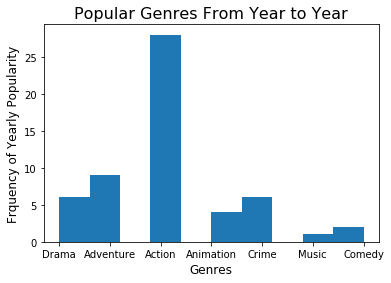

In [79]:
plt.hist(pop['genres'])
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Frquency of Yearly Popularity', fontsize=12)
plt.title('Popular Genres From Year to Year', fontsize =16) ;

 From the above chart, it can be conluded that the most common Genres from year to year is Action.
 The orders are Adventure, Drama, Crime etc.


### Q2:  What kinds of properties are associated with movies that have high revenues?

In [80]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df=pd.read_csv('cleaned_data.csv')
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length,rating
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,v_long,m_high
1,28.419936,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,v_long,high
2,13.112507,Insurgent,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,v_long,m_high
3,11.173104,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,v_long,high
4,9.335014,Furious 7,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,v_long,high


In [81]:
df.describe()


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,24690.000000,24690.000000,24690.000000,24690.000000,24690.000000,2.469000e+04,2.469000e+04
mean,0.749887,103.290765,270.904334,5.955516,2000.330215,2.287021e+07,6.640684e+07
std,1.149821,27.716170,662.706890,0.896470,12.957204,3.938350e+07,1.676924e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.246835,91.000000,20.000000,5.400000,1993.000000,0.000000e+00,0.000000e+00
50%,0.440934,100.000000,51.000000,6.000000,2004.000000,1.987650e+06,2.651523e+02
75%,0.834226,113.000000,196.000000,6.600000,2010.000000,3.049201e+07,5.442971e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


> From the prevoius cell, it can be seen that the this data set contains out liers since its maximum value in some column
> is far away from 75 percentile (75%)

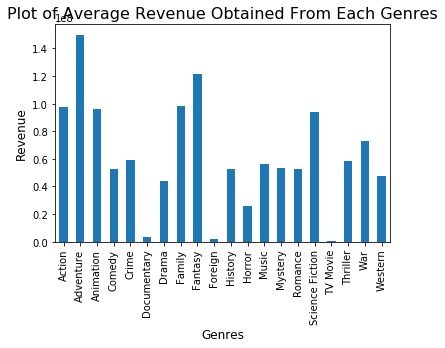

In [82]:
# Made a histogram to see the influence of genres on revenue
df.groupby('genres')['revenue_adj'].mean().plot(x='genres', y='revenue_adj', kind='bar')
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Plot of Average Revenue Obtained From Each Genres', fontsize =16);

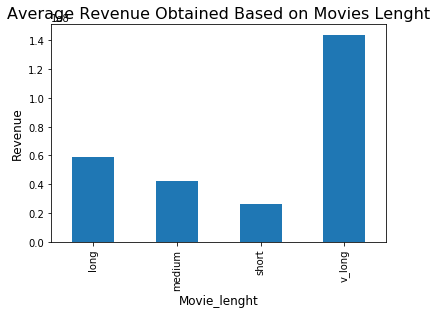

In [83]:
# Made a bar chart to see the influence of movie_lenght on revenue
df.groupby('movie_length')['revenue_adj'].mean().plot(x='movie_length', y='revenue_adj', kind='bar')
plt.xlabel('Movie_lenght', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Average Revenue Obtained Based on Movies Lenght', fontsize =16);

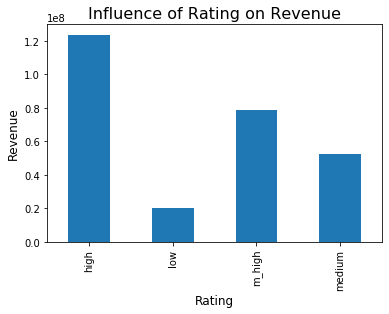

In [84]:
# Made a bar chart to see the influence of rating on revenue
df.groupby('rating')['revenue_adj'].mean().plot(x='rating', y='revenue_adj', kind='bar');
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Influence of Rating on Revenue', fontsize =16);

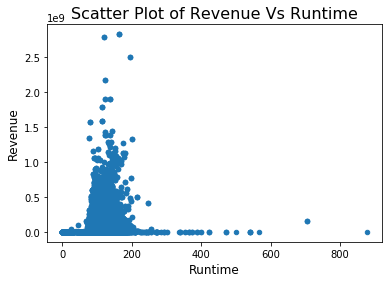

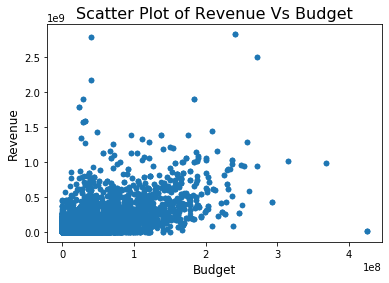

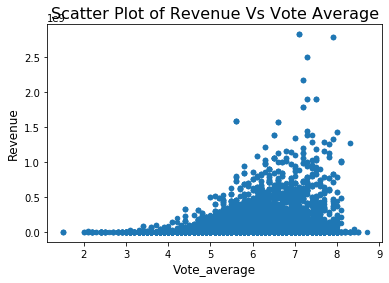

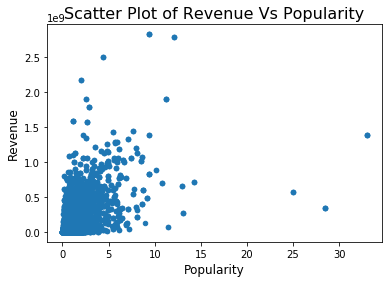

In [85]:
# Made a scatter plot of runtime, budget_adj, vote_average and popularity to see their influence on the revenue
df.plot(x='runtime', y='revenue_adj', kind='scatter');
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Scatter Plot of Revenue Vs Runtime', fontsize =16);

df.plot(x='budget_adj', y='revenue_adj', kind='scatter');
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Scatter Plot of Revenue Vs Budget', fontsize =16);

df.plot(x='vote_average', y='revenue_adj', kind='scatter');
plt.xlabel('Vote_average', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Scatter Plot of Revenue Vs Vote Average', fontsize =16);

df.plot(x='popularity', y='revenue_adj', kind='scatter');
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Scatter Plot of Revenue Vs Popularity', fontsize =16);

>From my analysis, I observed that the properties that affects the revenue are;
><li>The Genres
><li>Movie duration>
>
>The movie average_vote (rating) may also be said to an effect on the revenue generated but
>since the revenue generated is not a function of the avegrage vote, it can be ignored. 

###  Q3: What factors affect the movies average vote(rating)?

In [86]:
# Loaded Dataset
df = pd.read_csv('cleaned_data.csv')
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_length,rating
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,v_long,m_high
1,28.419936,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,v_long,high
2,13.112507,Insurgent,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,v_long,m_high
3,11.173104,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,v_long,high
4,9.335014,Furious 7,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,v_long,high


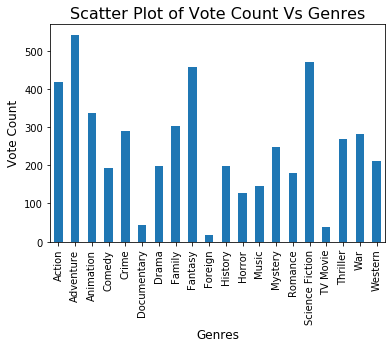

In [87]:
# Made a bar chart to see the influence of Genres on revenue
df.groupby('genres')['vote_count'].mean().plot(x='genres', y='vote_count', kind='bar');
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Vote Count', fontsize=12)
plt.title('Scatter Plot of Vote Count Vs Genres', fontsize =16);

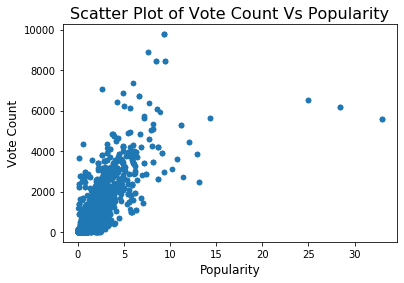

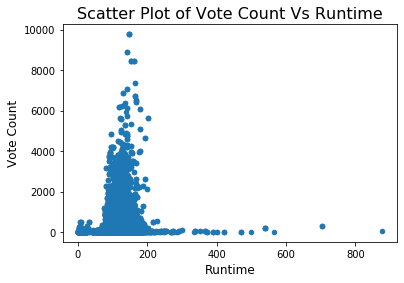

In [88]:
df.plot(x='popularity', y='vote_count', kind='scatter');
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Vote Count', fontsize=12)
plt.title('Scatter Plot of Vote Count Vs Popularity', fontsize =16);

df.plot(x='runtime', y='vote_count', kind='scatter');
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Vote Count', fontsize=12)
plt.title('Scatter Plot of Vote Count Vs Runtime', fontsize =16);

>From the above plots, it could be observed that the vote count is influenced by the movies Genres and popularity

<a id='conclusions'></a>
## Conclusions


>After carrying out my analysis on the TMBd Movies data set, the following conclusions where drawn from the data set;
><li> The most popular movie Genre from year to year is Action. Other genres that were found to be popular too where Adventure and Drame. Music Genre was found to be least popular.</li>
    
><li> The properties associated with movies having high revenue are their;</li>
>
> -  Genre, which is mostly adventure
>
> -  Duration (runtime group), which is usually long(113 - 877 minutes)
>   
>The movies rating (vote average group) could be said to be related to the revenue, for movies with high rating has higher revenue
        
><li> The movies vote count is affected by the movies genres and popularity</li>
    
> **Note**: The limitations in this analysis where out lier which could be found in the popularity and runtime. This in turning with have influence on the analysis when I was grouping some cells


